In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# Text classification for SMS spam detection

Outline:
- Feature extraction using bag-of-words
- train a binary classifier spam / not spam
- evaluate on test set

In [39]:
!head "datasets/smsspam/SMSSpamCollection"

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	Ok lar... Joking wif u oni...
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	U dun say so early hor... U c already then say...
ham	Nah I don't think he goes to usf, he lives around here though
spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
ham	Even my brother is not like to speak with me. They treat me like aids patent.
ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
spam	H

In [15]:
import pandas as pd
spam = pd.read_csv("datasets/smsspam/SMSSpamCollection", sep="\t", header=None, names=["target", "data"])

In [16]:
spam

,target,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [24]:
text = spam.data.tolist()
y = (spam.target == "spam").values

In [25]:
type(text)

list

In [26]:
type(y)

numpy.ndarray

In [28]:
from sklearn.cross_validation import train_test_split

text_train, text_test, y_train, y_test = train_test_split(text, y)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(text_train)

X_train = vectorizer.transform(text_train)
X_test = vectorizer.transform(text_test)

In [35]:
print(len(vectorizer.vocabulary_))


7413
[u'00', u'000', u'000pes', u'008704050406', u'0089', u'01223585334', u'0125698789', u'02', u'0207', u'02073162414', u'02085076972', u'021', u'03', u'04', u'0430', u'05', u'050703', u'0578', u'06', u'07']


In [36]:
print(vectorizer.get_feature_names()[:20])


[u'00', u'000', u'000pes', u'008704050406', u'0089', u'01223585334', u'0125698789', u'02', u'0207', u'02073162414', u'02085076972', u'021', u'03', u'04', u'0430', u'05', u'050703', u'0578', u'06', u'07']


In [37]:
print(vectorizer.get_feature_names()[3000:3020])

[u'gives', u'giving', u'glad', u'glands', u'glasgow', u'glass', u'glo', u'global', u'glory', u'gloucesterroad', u'gm', u'gmw', u'gn', u'gnarls', u'gnt', u'gnun', u'go', u'go2', u'go2sri', u'goal']


In [50]:
print(X_train.shape)
print(X_test.shape)

(4179, 7413)
(1393, 7413)


### Training a Classifier on Text Features

We can now train a classifier, for instance a Multinomial Naive Bayesian classifier which is a fast baseline for text classification tasks:

In [83]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [84]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

We can now evaluate the classifier on the testing set. Let's first use the builtin score function, which is the rate of correct classification in the test set:

In [85]:
clf.score(X_test, y_test)

0.98492462311557794

We can also compute the score on the training set, to see how well we do there:

In [87]:
clf.score(X_train, y_train)

0.99760708303421874

#Visualizing important features

In [88]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # p[lot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(50), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 51), feature_names[interesting_coefficients], rotation=60, ha="right");

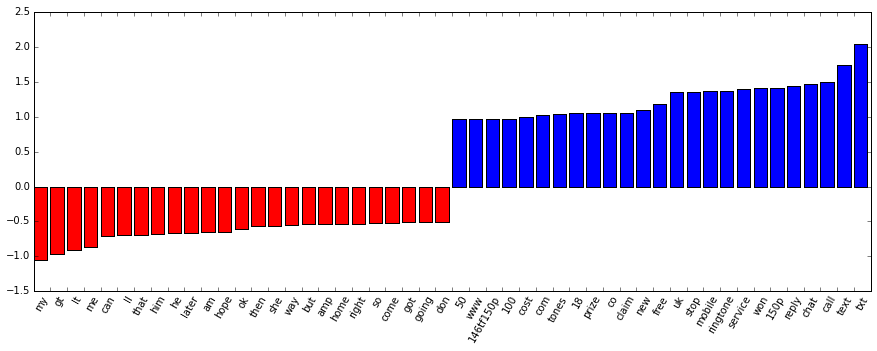

In [89]:
visualize_coefficients(clf, vectorizer.get_feature_names())


In [114]:
vectorizer = CountVectorizer(min_df=2)
vectorizer.fit(text_train)

X_train = vectorizer.transform(text_train)
X_test = vectorizer.transform(text_test)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.995692749462
0.985642498205


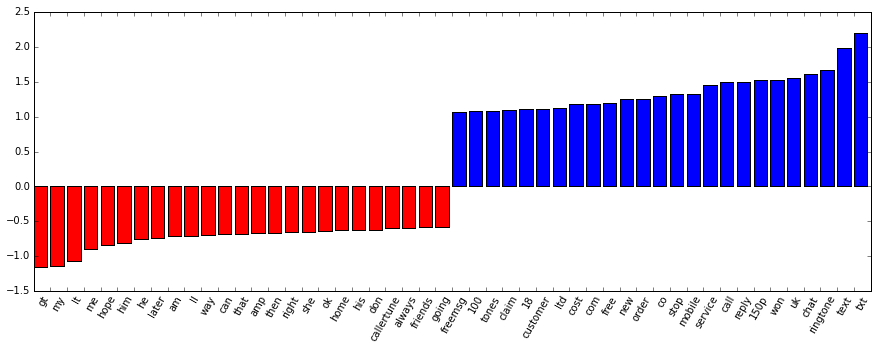

In [113]:
visualize_coefficients(clf, vectorizer.get_feature_names())


![pipeline](figures/supervised_scikit_learn.png)

# Exercises

Use TfidfVectorizer instead of CountVectorizer. Are the results better? How are the coefficients different?

Change the parameters min_df and ngram_range of the TfidfVectorizer and CountVectorizer. How does that change the important features?

